In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Regla del trapesoide

In [ ]:
def trapecios(funcion,a,b,n):
    delta = (b-a)/n
    puntos = np.linspace(a,b,n)
    vector = []
    vector.append(funcion(puntos[0]))
    vector.append(funcion(puntos[-1]))
    for i in range(1,len(puntos)-1):
        vector.append(2*funcion(puntos[i]))
    return delta*(sum(vector))/2

In [ ]:
def funcion(x):
    return 3*x**2-np.cos(x)

In [ ]:
trapecios(funcion,0,4,1000000)

64.75673773853607

Probamos integrando $f(x)=e^{-x²}$ cuya integral en toda la recta es $\sqrt{\pi}$

In [ ]:
def exp(x):
    return np.e**(-x**2)

In [ ]:
print("respuesta",np.sqrt(np.pi))
for i in np.arange(1,10000,1000):
    print(trapecios(exp,-i,i,100000))

respuesta 1.7724538509055159
1.4936333290931414
1.7724361263670059
1.7724361263670039
1.772436126367009
1.7724361263669985
1.7724361263669597
1.7724361263670139
1.7724361263670667
1.772436126367052
1.7724361263670427


Considerar el nucleo de Drichlet dado por:

a. Graficar $D_N$ en el intervalo $[-\pi,\pi]$ para distintos valores de $N$

In [ ]:
def nucleo_dirichlet(x):
    return np.sin((N+1/2)*x)/(2*np.sin(x/2))

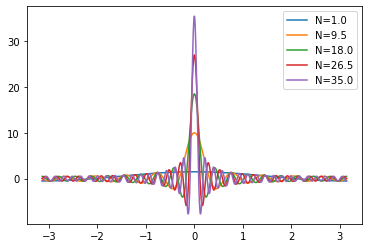

In [ ]:
x = np.linspace(-np.pi,np.pi,1000)
for i in np.linspace(1,35,5):
    N=i
    plt.plot(x,nucleo_dirichlet(x),label=f"N={i}")
plt.legend()

b. Estimar la integral para distintos valores de N y verificar si se cumple que: (poner)

In [ ]:
for i in np.linspace(1,10000,10):
    N=i
    print((1/np.pi)*trapecios(nucleo_dirichlet,-np.pi,np.pi,1000))

0.9990000000000027
-0.9990000000000504
0.9989999999999628
-0.9989999999999946
0.999
-0.9989999999999893
0.9990000000000872
-0.9990000000001709
0.9989999999996187
0.9989999999988579


### Coeficientes de Fourier

In [ ]:
def fourier_coeficientes(func,N):
    coef_a = []
    coef_b = []
    for n in range(N):
        def funcion_cos(x):
                return func(x)*np.cos(n*x)
        def funcion_sen(x):
                return func(x)*np.sin(n*x)

        coef_a.append(1/np.pi*(trapecios(funcion_cos,-np.pi,np.pi,1000)))
        coef_b.append(1/np.pi*(trapecios(funcion_sen,-np.pi,np.pi,1000)))
    return coef_a,coef_b

def fourier(func,x,N):
    a,b = fourier_coeficientes(func,N)
    termino1 = a[0]/2
    termino2, termino3 = 0,0
    for i in range(1,N):
        termino1=termino1+a[i]*np.cos(i*x)
        termino3=termino3+b[i]*np.sin(i*x)
    return termino1+termino2+termino3

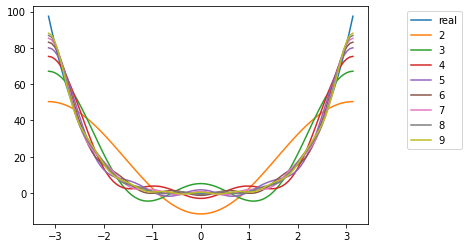

In [ ]:
def func(x):
    return x**4

fig = plt.figure()
plt.plot(dominio,dominio**4,label="real")

for j in range(2,10):
    N=j
    dominio = np.linspace(-np.pi,np.pi,100)
    imagen = []
    for i in dominio:
        imagen.append(fourier(func,i,N))
    plt.plot(dominio,imagen,label=f"{j}")
plt.legend(bbox_to_anchor=(1.1,1),loc="upper left")
plt.show()